### p値の意味と誤用

p値は、統計学に基づいた科学的手法で研究を行い、その結果の有意性を確認するために非常に重要なツールの一つです。しかし、多くの研究者がp値を誤って使用したり、場合によってはp値の特性を利用して研究結果を誇張することもあります。

この記事では、p値の意味と代表的な誤用例について説明します。

### p値の意味
まずは少し硬いですが、p値の数学的な意味から見ていきましょう。その後、p値についてより簡単に理解できるように説明します。

例えば、私たちが2つの標本集団の平均値に統計的に有意な差があるかどうかを検証するとします。このとき、2つの標本集団から検定統計量（例えばt値）を計算することができます。

p値はこの検定統計量に関する確率であり、私たちが得た検定統計量以上の値が得られる確率を意味します。

ここで非常に重要な点の一つは、私たちが計算する検定統計量の多くは、ほとんどの場合、帰無仮説を仮定して得られるということです。

つまり、2つの標本平均の差を検証する際には、2つの標本集団が同じ母集団から出てきたという前提を置いています。

ですから、p値が言わんとしていることを大まかに簡単な言葉で表現すると、次のようになります。

「私たちが得たデータに含まれる2つの標本集団が同じ母集団から出てきたとしよう。その時にこのような検定統計量（例えばt値）が得られたが、これがどれほど現実的なものなのか？」

### p値の便利さ
人々は便利なものが好きです。研究分野においても同様に、誰もが研究結果を複雑に説明するのではなく、できるだけ簡単に、そしてわかりやすく説明したいと思っています。

2つの標本集団の差を比較して結果を出した研究があるとしましょう。私たちはさまざまな方法で2つの標本集団の差について説明することができます。すべてのデータ値を書き出す方法もあれば、2つのデータのヒストグラムを描いて視覚的に示す方法もあります。しかし、これらの方法は厳密さが欠けているため、限界があるのも事実です。

このため、厳密さを担保するために登場したのが検定統計量です。

t値をどのように計算したのかを思い出してみましょう。t値は、2つの標本間の平均差を、その差に対する不確実性で割ることで、集団間の差とその差がどれだけ確かなものかを一度に説明しています。

したがって、検定統計量を提示することで、2つの標本集団間の差を厳密かつ便利な方法で表現できるようになりました。

しかし、もう一つの問題がありました。t分布は標本数（自由度）によって形が変わるため、同じt値でも標本数によって標本間の差が十分に大きいと言える場合もあれば、そうでない場合もあります。

このような過程を考えると、なぜp値のような「確率」を有意性を検証する指標として用いたのかが理解できます。標本数に関係なく、検定統計量の分布の形に関係なく、確率という値だけを記載しておけば混乱することはありません。

確率は正規化された値であるため、基準値が一つ定められていれば、実験結果の有意性を一目で把握しやすくなります。一般的には5%の基準がよく使用されます。このため、p値が5%より小さい場合、有意な差があると言います。

### 便利さの裏にある問題
p値は検定統計量が圧縮的に持っていた情報をさらに圧縮しました。

つまり、p値は効果の大きさ（効果量）と標本の大きさ（n数）の情報を一度に含んでいます。

そのため、効果の大きさが増すか、標本の大きさが増すか、どちらか一方でも変化すると、p値はあたかも有意な差があるかのように小さくなることが分かります。

#### 効果の大きさ（Effect Size）
例：標本平均間の差

**図1. 同じn数に対して効果量が変化することでp値が変化する様子。**

#### 標本の大きさ（n数）
例：t値で標本の大きさは不確実性、自由度に含まれている概念です。

**図2. 同じ効果量に対してn数が変化することでp値が変化する様子。**

図1と2からわかるように、効果量が変わってp値が小さくなる現象だけでなく、n数が増えることでp値が小さくなる現象も確認できます。

つまり、実際には同じ母集団から2つの標本集団が出てきたにもかかわらず、p値が0.05未満になることがあり、帰無仮説が棄却され対立仮説が採用されても、対立仮説が真であるとは限りません。

最近では科学技術の進展により、膨大なn数のデータを容易に得ることができる研究も増えているため、統計的検証段階でp値を過信しないよう特に注意を払う必要があると思われます。

### 参考文献
- Primer of Biostatistics 6th Edition, Stanton A. Glantz, McGraw-Hill Medical Publishing Division

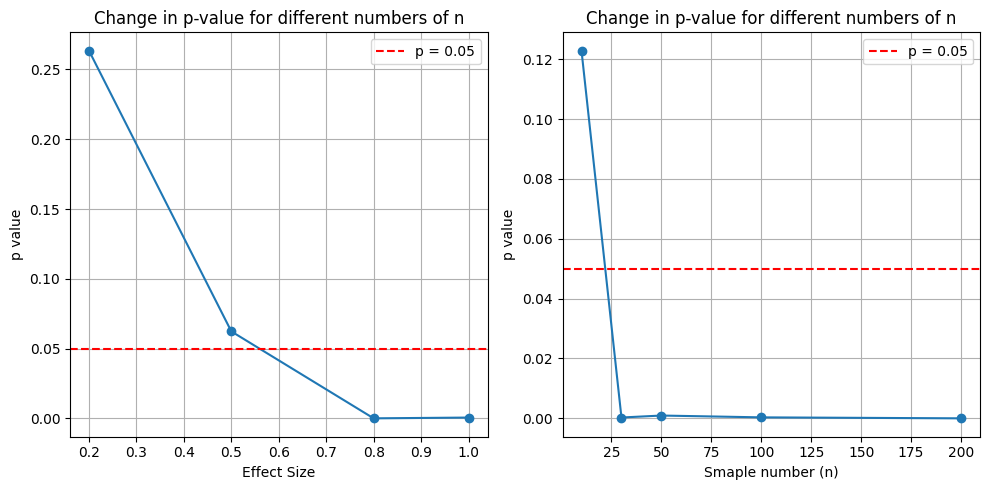

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 効果の大きさと標本の大きさがp値に与える影響を可視化する

# 効果の大きさが異なる場合のp値
np.random.seed(42)
n = 30  # 固定された標本数
effect_sizes = [0.2, 0.5, 0.8, 1.0]  # 効果量のリスト
p_values_effect = []

for effect in effect_sizes:
    # サンプルデータを生成
    group1 = np.random.normal(0, 1, n)  # 平均0, 標準偏差1の集団
    group2 = np.random.normal(effect, 1, n)  # 平均が効果量だけ異なる集団
    t_stat, p_value = stats.ttest_ind(group1, group2)
    p_values_effect.append(p_value)

# n数が異なる場合のp値
sample_sizes = [10, 30, 50, 100, 200]  # 標本数のリスト
effect_size = 0.5  # 固定された効果量
p_values_sample_size = []

for n in sample_sizes:
    group1 = np.random.normal(0, 1, n)
    group2 = np.random.normal(effect_size, 1, n)
    t_stat, p_value = stats.ttest_ind(group1, group2)
    p_values_sample_size.append(p_value)

# グラフを描画
plt.figure(figsize=(10, 5))

# 効果の大きさによるp値の変化
plt.subplot(1, 2, 1)
plt.plot(effect_sizes, p_values_effect, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='p = 0.05')
plt.xlabel('Effect Size')
plt.ylabel('p value')
plt.title('Change in p-value for different numbers of n')
plt.grid(True)
plt.legend()

# n数によるp値の変化
plt.subplot(1, 2, 2)
plt.plot(sample_sizes, p_values_sample_size, marker='o')
plt.axhline(y=0.05, color='r', linestyle='--', label='p = 0.05')
plt.xlabel('Smaple number (n)')
plt.ylabel('p value')
plt.title('Change in p-value for different numbers of n')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


もちろんです。それぞれのグラフについて詳細に説明します。

### グラフ 1: 効果量が異なる場合の p 値の変化
#### 概要
- **横軸（x軸）**: 効果量（Effect Size）。効果量は、2つの集団間の違いがどの程度大きいかを定量的に表したものです。ここでは0.2, 0.5, 0.8, 1.0のように徐々に増加させた効果量を使用しています。
- **縦軸（y軸）**: p値。統計的有意性を示すための確率の指標です。通常、p値が 0.05 未満であれば、「有意差がある」と判断されます。
- **赤の破線**: p = 0.05 のライン。これを境に p 値が小さいときは「有意差あり」と判定します。

#### 結果の解釈
- グラフを見ると、効果量が大きくなるにつれて p 値が低下しています。具体的には、効果量が小さい (例えば 0.2) 場合には p 値が 0.05 を上回ることが多く、有意な差がない可能性がありますが、効果量が大きくなるにつれて p 値が 0.05 未満になり、「統計的に有意」と判定されます。
  
- **効果量が増加すると、p 値が低下する理由**:
  - 効果量が大きいということは、2つの集団間の差がはっきりとしていることを意味します。そのため、統計的検定においてもその差が「偶然ではない」と判断される可能性が高くなり、p 値が低くなります。
  
- **重要な注意点**:
  - 効果量が小さいときでも、p 値が高いため「有意な差がない」という結論になりますが、それは必ずしも効果がないというわけではありません。効果が小さいだけで、検出が難しい場合もあります。

### グラフ 2: n 数（標本数）が異なる場合の p 値の変化
#### 概要
- **横軸（x軸）**: 標本数 (n)。標本数は、統計的な分析に使用するデータの量を表します。ここでは 10, 30, 50, 100, 200 といった異なる標本数を設定しています。
- **縦軸（y軸）**: p 値。
- **赤の破線**: p = 0.05 のライン。

#### 結果の解釈
- グラフを見ると、標本数が増加するにつれて p 値が低下しています。標本数が 10 から始まり、徐々に増加することで p 値が小さくなり、最終的には 0.05 を下回ることが観察されます。

- **標本数が増加すると、p 値が低下する理由**:
  - 標本数が多くなると、サンプルのデータが母集団をよりよく代表するようになります。これにより、実際の差を検出する力が強くなり、p 値が低くなる傾向があります。つまり、少ない標本数では観察されない差も、標本数が増加することで検出できるようになるためです。
  
- **標本数と p 値の関係から分かる問題点**:
  - 標本数が非常に大きい場合、非常に小さな差であっても統計的に有意であると判定されてしまいます。つまり、実際には「意味のない」差であっても、p 値が小さくなることで有意な結果だと誤解される可能性があります。このようなケースでは、p 値が小さいことが実際に意味のある差を示しているのかどうか、慎重に考える必要があります。

### p 値の誤用についてのまとめ
1. **効果量と p 値の関係**:
   - 効果量が大きいほど、p 値は低くなる傾向にあり、統計的に有意であると判断される可能性が高くなります。しかし、p 値が小さいからといって効果が大きいとは限りません。効果量そのものを確認しないと、実際にその効果がどれほど大きいかは判断できません。

2. **標本数と p 値の関係**:
   - 標本数が大きくなると、統計的な検定力が増加し、p 値が小さくなる可能性があります。このことは、非常に大きな標本数を使うと、わずかな違いでも「有意」となることを示しています。これにより、実際には重要でない差が統計的に有意とされることがあり、これを誤って解釈しないよう注意が必要です。

3. **誤解されやすい点**:
   - **p 値が小さい＝効果がある**という誤解: p 値が 0.05 より小さいということは「統計的に有意」であることを意味しますが、それが「実際に意味のある効果」であるとは限りません。特に、効果量や標本数の影響を考慮せずに p 値だけで判断するのは危険です。

### 具体的な注意点と結論
- **p 値を過信しない**:
  - p 値は、差が統計的に有意であるかを示す指標ですが、その背後にある効果の大きさやサンプルの状況も重要です。p 値だけで判断すると、実際には小さい効果や無意味な差を「重要」と誤解するリスクがあります。

- **効果量を合わせて見る**:
  - 効果量は、2つの集団の間の差の大きさを示すものであり、実際の意味のある差を理解するのに重要です。p 値が有意であったとしても、効果量が小さい場合、それは実際には重要ではない可能性があります。

- **サンプルサイズの影響を理解する**:
  - サンプルサイズが大きくなると、p 値は小さくなる傾向があるため、結果が「有意」であっても、それが実際の効果によるものか、サンプルサイズの大きさによるものかを区別する必要があります。

このように、p 値の特性や限界を理解することが重要です。単に p 値が有意であるという理由で結論を急がず、効果量やデータの実質的な意味を総合的に評価することで、より正確で有意義な結論を導くことができます。